In [1]:
# HPC
import netCDF4 as nc
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
### Load data

dataPath = '/scratch2/shreyas/GrIS_paleo_data/'
ds_temp = xr.open_dataset(dataPath + 'RDBTS4_Greenland_1993_2017_02_basal_thermal_state.nc')
ds_vel  = xr.open_dataset(dataPath + 'RDGBV4_Greenland_1993_2013_01_balance_velocity_9ka.nc')
ds_bm5  = xr.open_dataset(dataPath + 'BedMachineGreenland-v5.nc')
ds_age  = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid.nc')
ds_bm5_40kms = xr.load_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
ds_fake_bm5_40kms = xr.load_dataset("/scratch2/shreyas/GrIS_paleo_data/fake_bm5_data_40kms.nc")

# Convert metres to kms
ds_bm5['x'] = ds_bm5['x']*0.001
ds_bm5['y'] = ds_bm5['y']*0.001
ds_temp['x'] = ds_temp['x']*0.001
ds_temp['y'] = ds_temp['y']*0.001

### Load model outputs

modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka/'
ds_model = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka0011.nc')
ds_model_nudged = xr.open_dataset("/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_spinup02_smooth_100a/grl40_bm5_spinup02_smooth_100a0001.nc")

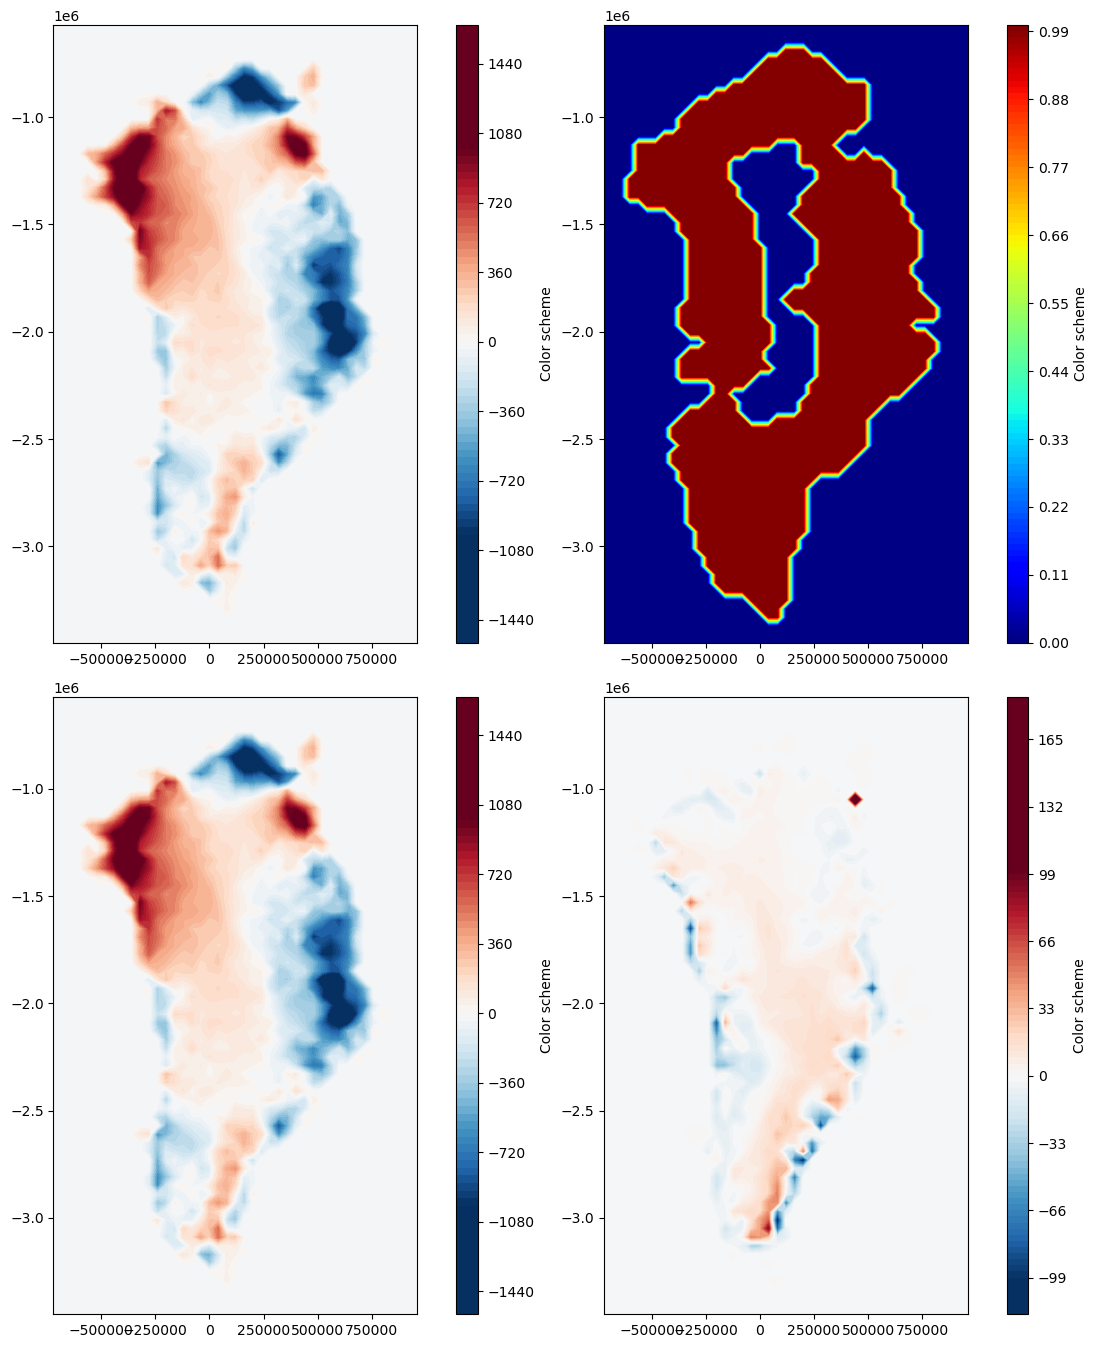

In [3]:
n_rows, n_cols = 2, 2
aspect_ratio = len(ds_model['x'])/len(ds_model['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+0.75)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         ds_bm5_40kms['H'].data-ds_model['H'].data,
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100, fig = fig, ax = ax[0, 0])

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         ds_fake_bm5_40kms['zl'].data >= 0,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[0, 1])

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         ds_bm5_40kms['H'].data-ds_model["H"].data,
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100, fig = fig, ax = ax[1, 0])

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         ds_bm5_40kms['H'].data-ds_model_nudged["H"].data,
                         cmap = 'RdBu_r', vmin = -100, vmax = 100, nbins = 100, fig = fig, ax = ax[1, 1])

plt.tight_layout()

In [4]:
costs_H = 0.5*(ds_model["H"].data - ds_bm5_40kms["H"].data)**2/ds_bm5_40kms["H_uncert"].data**2
cost_H = np.sum(costs_H)
cost_H

4773.665

In [5]:
costs_H_masked = 0.5*(ds_model["H"].data - ds_bm5_40kms["H"].data)**2/ds_bm5_40kms["H_uncert"].data**2 * (ds_bm5_40kms["H"].data == 0)
cost_H_masked = np.sum(costs_H_masked)
cost_H_masked

580.0361

In [6]:
costs_H_masked = 0.5*(ds_model["H"].data - ds_bm5_40kms["H"].data)**2/ds_bm5_40kms["H_uncert"].data**2 * (ds_bm5_40kms["H"].data > 0)
cost_H_masked = np.sum(costs_H_masked)
cost_H_masked

4193.6294

In [7]:
costs_H_masked = 0.5*(ds_model["H"].data - ds_bm5_40kms["H"].data)**2/ds_bm5_40kms["H_uncert"].data**2 * (ds_bm5_40kms["H"].data >= 500)
cost_H_masked = np.sum(costs_H_masked)
cost_H_masked

3996.903

In [8]:
costs_H_masked = 0.5*(ds_model["H"].data - ds_bm5_40kms["H"].data)**2/ds_bm5_40kms["H_uncert"].data**2 * (ds_bm5_40kms["H"].data >= 2000)
cost_H_masked = np.sum(costs_H_masked)
cost_H_masked

3378.4958

In [9]:
costs_zl = 0.5*(ds_model["zl"].data - ds_bm5_40kms["zl"].data)**2/ds_bm5_40kms["zl_uncert"].data**2
cost_zl = np.sum(costs_zl)
cost_zl

1093.8867

In [10]:
costs_zl_masked = 0.5*(ds_model["zl"].data - ds_bm5_40kms["zl"].data)**2/ds_bm5_40kms["zl_uncert"].data**2 * (ds_bm5_40kms["H"].data > 0)
cost_zl_masked = np.sum(costs_zl_masked)
cost_zl_masked

180.37332

In [11]:
costs_zl_masked = 0.5*(ds_model["zl"].data - ds_bm5_40kms["zl"].data)**2/ds_bm5_40kms["zl_uncert"].data**2 * (ds_bm5_40kms["H"].data >= 500)
cost_zl_masked = np.sum(costs_zl_masked)
cost_zl_masked

73.43108

In [12]:
costs_zl_masked = 0.5*(ds_model["zl"].data - ds_bm5_40kms["zl"].data)**2/ds_bm5_40kms["zl_uncert"].data**2 * (ds_bm5_40kms["H"].data >= 2000)
cost_zl_masked = np.sum(costs_zl_masked)
cost_zl_masked

18.940187

In [13]:
costs_H_modified = 0.5*(ds_model["H"].data - ds_bm5_40kms["H"].data)**2/ds_bm5_40kms["H_uncert_modified"].data**2
cost_H_modified = np.sum(costs_H_modified)
cost_H_modified

21197.88

In [14]:
costs_H_modified_masked = 0.5*(ds_model["H"].data - ds_bm5_40kms["H"].data)**2/ds_bm5_40kms["H_uncert_modified"].data**2 * (ds_bm5_40kms["H"].data == 0)
cost_H_modified_masked = np.sum(costs_H_modified_masked)
cost_H_modified_masked

2055.9746

In [15]:
costs_H_modified_masked = 0.5*(ds_model["H"].data - ds_bm5_40kms["H"].data)**2/ds_bm5_40kms["H_uncert_modified"].data**2 * (ds_bm5_40kms["H"].data > 0)
cost_H_modified_masked = np.sum(costs_H_modified_masked)
cost_H_modified_masked

19141.906

In [16]:
costs_H_modified_masked = 0.5*(ds_model["H"].data - ds_bm5_40kms["H"].data)**2/ds_bm5_40kms["H_uncert_modified"].data**2 * (ds_bm5_40kms["H"].data >= 500)
cost_H_modified_masked = np.sum(costs_H_modified_masked)
cost_H_modified_masked

18726.854

In [17]:
costs_H_modified_masked = 0.5*(ds_model["H"].data - ds_bm5_40kms["H"].data)**2/ds_bm5_40kms["H_uncert_modified"].data**2 * (ds_bm5_40kms["H"].data >= 2000)
cost_H_modified_masked = np.sum(costs_H_modified_masked)
cost_H_modified_masked

18050.594

In [18]:
costs_zl_modified = 0.5*(ds_model["zl"].data - ds_bm5_40kms["zl"].data)**2/ds_bm5_40kms["zl_uncert_modified"].data**2
cost_zl_modified = np.sum(costs_zl_modified)
cost_zl_modified

2942.754

In [19]:
costs_zl_modified_masked = 0.5*(ds_model["zl"].data - ds_bm5_40kms["zl"].data)**2/ds_bm5_40kms["zl_uncert_modified"].data**2 * (ds_bm5_40kms["H"].data > 0)
cost_zl_modified_masked = np.sum(costs_zl_modified_masked)
cost_zl_modified_masked

613.10846

In [20]:
costs_zl_modified_masked = 0.5*(ds_model["zl"].data - ds_bm5_40kms["zl"].data)**2/ds_bm5_40kms["zl_uncert_modified"].data**2 * (ds_bm5_40kms["H"].data >= 500)
cost_zl_modified_masked = np.sum(costs_zl_modified_masked)
cost_zl_modified_masked

256.83765

In [21]:
costs_zl_modified_masked = 0.5*(ds_model["zl"].data - ds_bm5_40kms["zl"].data)**2/ds_bm5_40kms["zl_uncert_modified"].data**2 * (ds_bm5_40kms["H"].data >= 2000)
cost_zl_modified_masked = np.sum(costs_zl_modified_masked)
cost_zl_modified_masked

92.55899

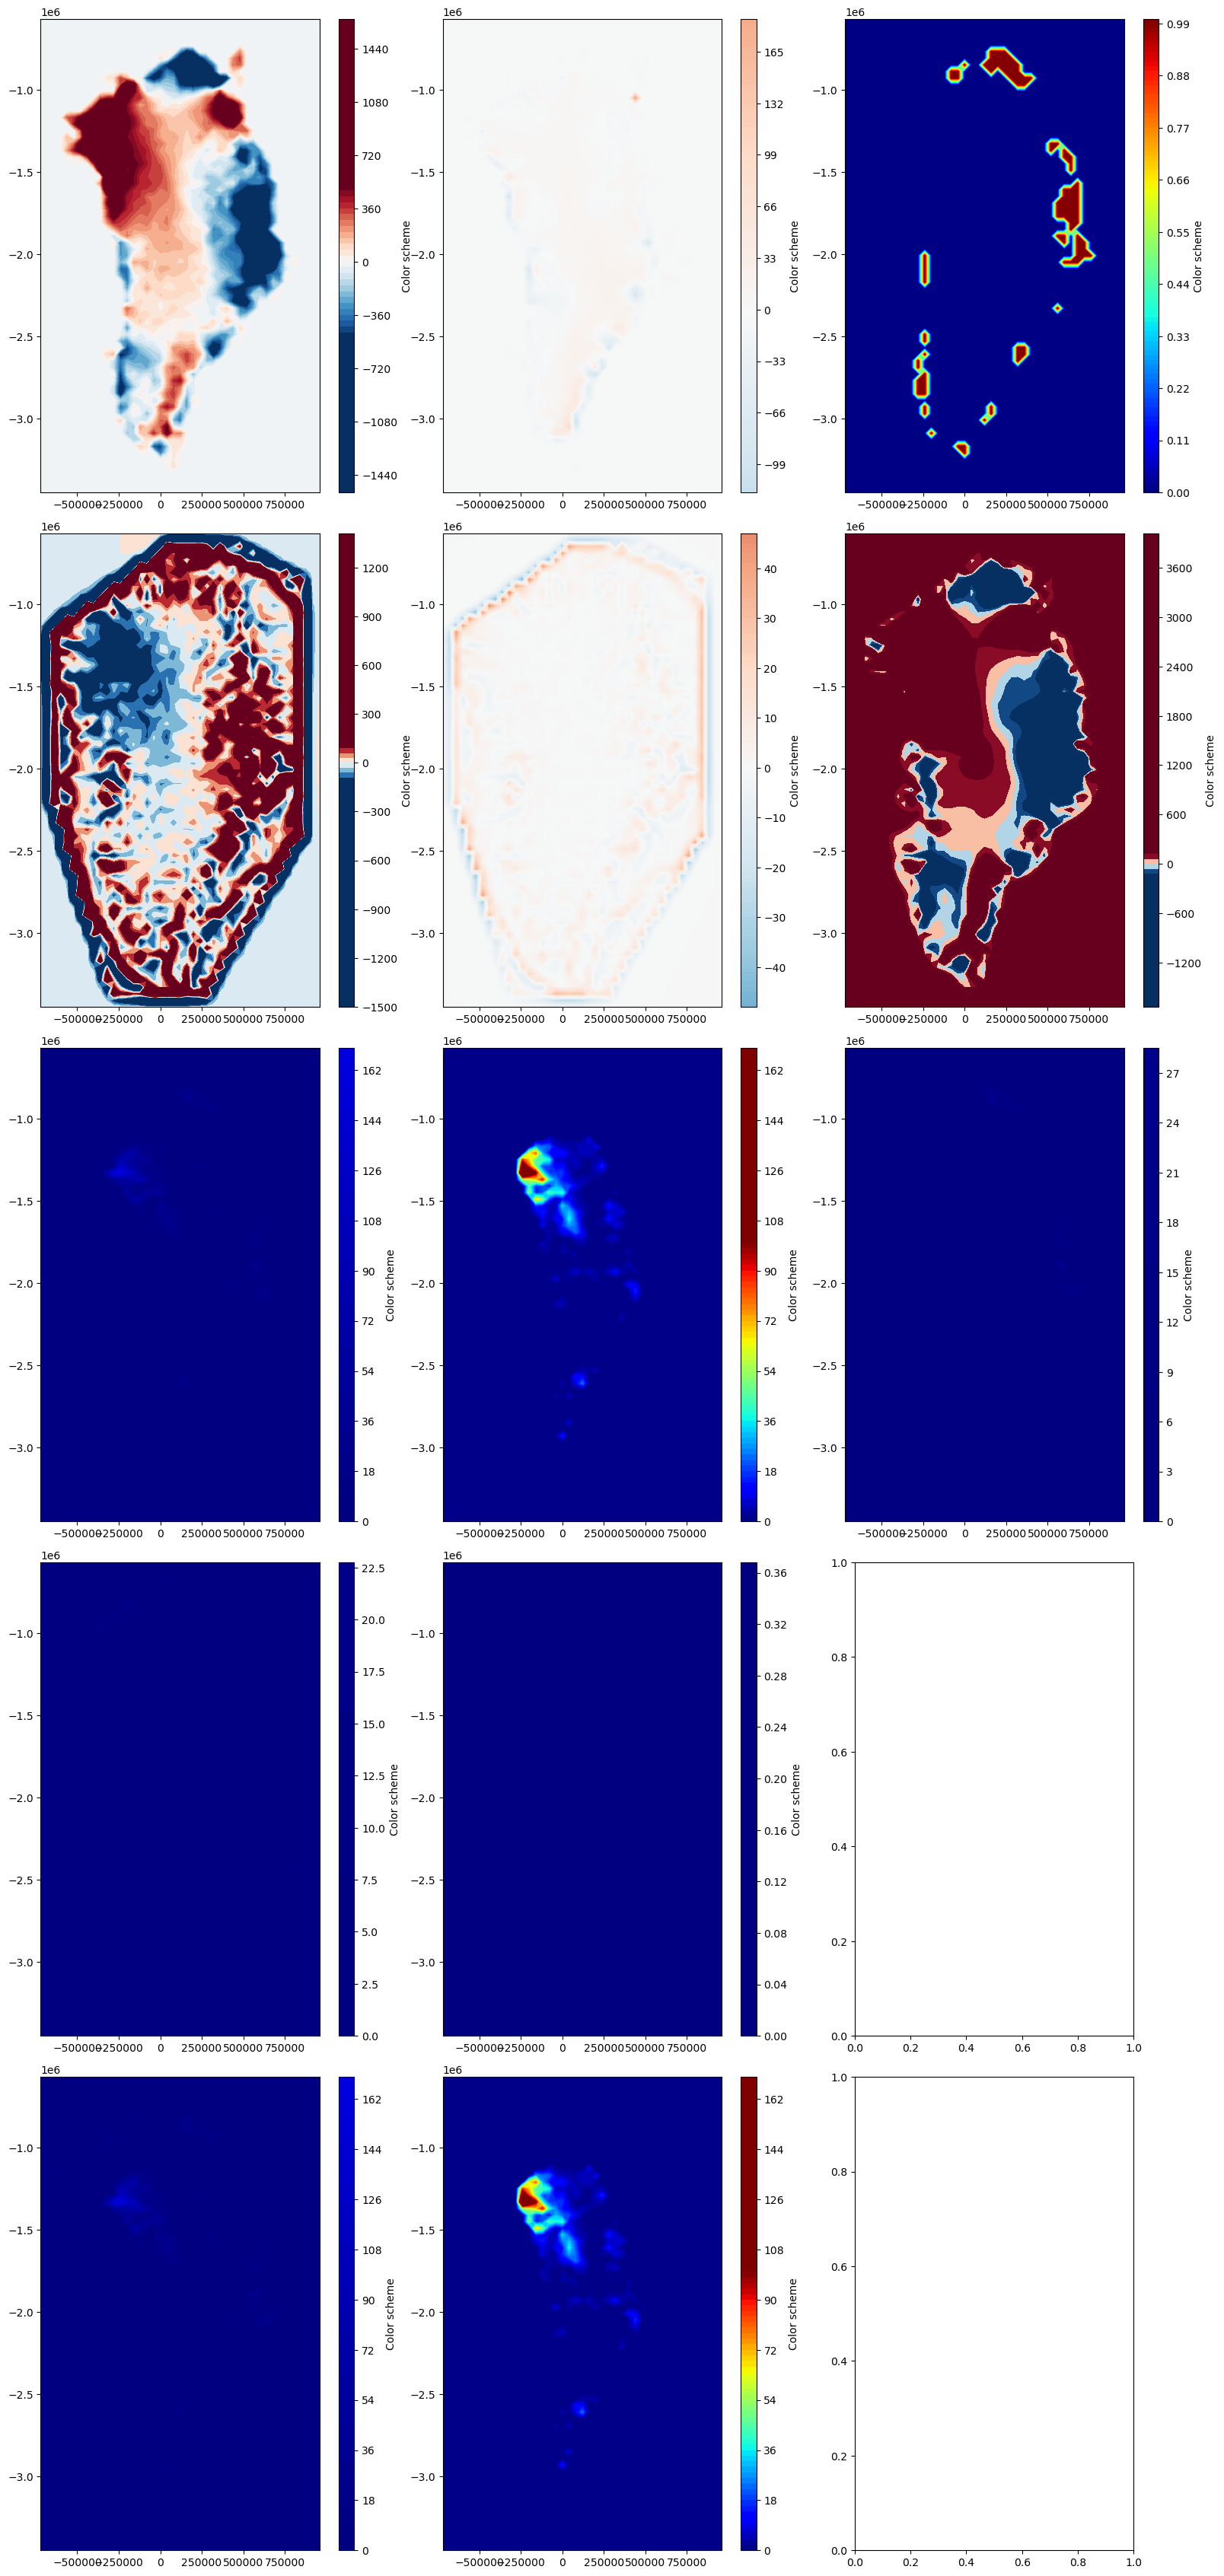

In [22]:
n_rows, n_cols = 5, 3
aspect_ratio = len(ds_model['x'])/len(ds_model['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.0)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         ds_bm5_40kms['H'].data-ds_model["H"].data,
                         cmap = 'RdBu_r', vmin = -500, vmax = 500, nbins = 100, fig = fig, ax = ax[0, 0])

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         ds_bm5_40kms['H'].data-ds_model_nudged["H"].data,
                         cmap = 'RdBu_r', vmin = -500, vmax = 500, nbins = 100, fig = fig, ax = ax[0, 1])

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         ((ds_bm5_40kms['H'].data == 0.0) & (ds_model["H"].data > 0)),
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[0, 2])

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         ds_bm5_40kms['zl'].data-ds_model["zl"].data,
                         cmap = 'RdBu_r', vmin = -100, vmax = 100, nbins = 100, fig = fig, ax = ax[1, 0])

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         ds_bm5_40kms['zl'].data-ds_model_nudged["zl"].data,
                         cmap = 'RdBu_r', vmin = -100, vmax = 100, nbins = 100, fig = fig, ax = ax[1, 1])

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         ds_bm5_40kms['zs'].data-ds_model["zs"].data,
                         cmap = 'RdBu_r', vmin = -100, vmax = 100, nbins = 100, fig = fig, ax = ax[1, 2])

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         costs_H,
                         cmap = 'jet', vmin = 0, vmax = 2000, nbins = 100, fig = fig, ax = ax[2, 0])

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         costs_H_masked,
                         cmap = 'jet', vmin = 0, vmax = 100, nbins = 100, fig = fig, ax = ax[2, 1])

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         costs_H * ((ds_bm5_40kms['H'].data == 0.0) & (ds_model["H"].data > 0)),
                         cmap = 'jet', vmin = 0, vmax = 2000, nbins = 100, fig = fig, ax = ax[2, 2])

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         costs_zl,
                         cmap = 'jet', vmin = 0, vmax = 2000, nbins = 100, fig = fig, ax = ax[3, 0])

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         costs_zl_masked,
                         cmap = 'jet', vmin = 0, vmax = 100, nbins = 100, fig = fig, ax = ax[3, 1])

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         costs_H + costs_zl,
                         cmap = 'jet', vmin = 0, vmax = 2000, nbins = 100, fig = fig, ax = ax[4, 0])

fancyPlotter.plot_normal(ds_bm5_40kms['x'], ds_bm5_40kms['y'], 
                         costs_H_masked + costs_zl_masked,
                         cmap = 'jet', vmin = 0, vmax = 100, nbins = 100, fig = fig, ax = ax[4, 1])

plt.tight_layout()